In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
titanic_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [64]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
#하수
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [67]:
titanic_df.groupby(['Pclass','Sex'])['Age'].size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Age, dtype: int64

In [77]:
titanic_df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    32.500000
        male      36.000000
2       female    28.500000
        male      29.699118
3       female    28.000000
        male      29.699118
Name: Age, dtype: float64

In [78]:
titanic_df['Age'] = (
    titanic_df
    .groupby(['Pclass','Sex'])['Age']
    .transform(lambda x: x.fillna(x.median()))
    .astype(int)
)

In [79]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [80]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N')

In [81]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [82]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S


In [86]:
#이상치 체크
  
num_df = titanic_df.select_dtypes(include='number').columns
num_df

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='str')

In [ ]:
for col in num_df:
    Q1 = titanic_df[col].quantile(0.25)
    Q3 = titanic_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 *  IQR
    upper = Q3 + 1.5 *  IQR

    print(f'{col}이상치갯수:')
    print(lower)
    print(upper)

PassengerId이상치갯수:
-444.0
1336.0
Survived이상치갯수:
-1.5
2.5
Pclass이상치갯수:
0.5
4.5
Age이상치갯수:
2.5
54.5
SibSp이상치갯수:
-1.5
2.5
Parch이상치갯수:
0.0
0.0
Fare이상치갯수:
-26.724
65.6344


<Axes: xlabel='Fare', ylabel='Count'>

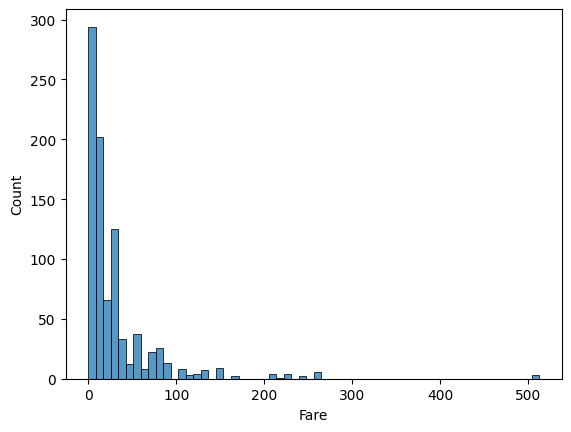

In [88]:
sns.histplot(titanic_df['Fare'])

In [90]:
titanic_df['Fare'] = titanic_df['Fare'].clip(0,300)

<Axes: xlabel='Fare', ylabel='Count'>

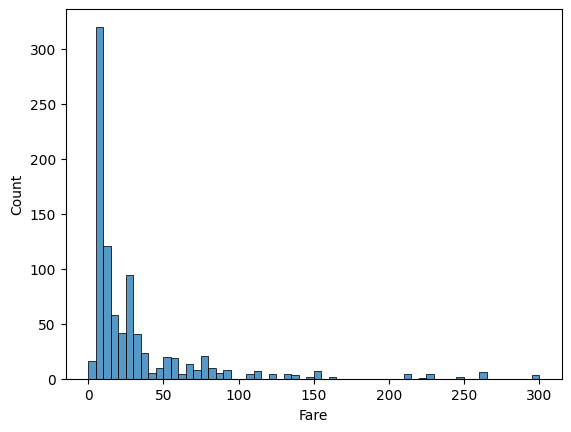

In [91]:
sns.histplot(titanic_df['Fare'])

<Axes: xlabel='Age', ylabel='Count'>

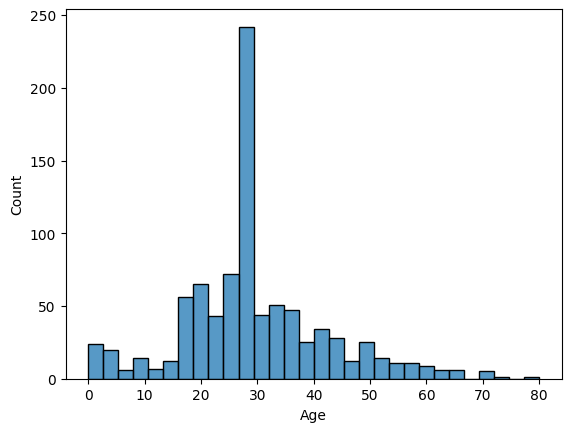

In [89]:
sns.histplot(titanic_df['Age'])

<Axes: xlabel='Sex', ylabel='count'>

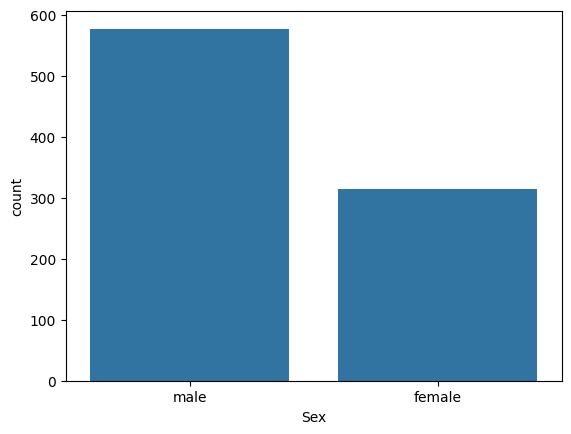

In [98]:
sns.countplot(x='Sex',data=titanic_df)

<Axes: xlabel='Sex', ylabel='Survived'>

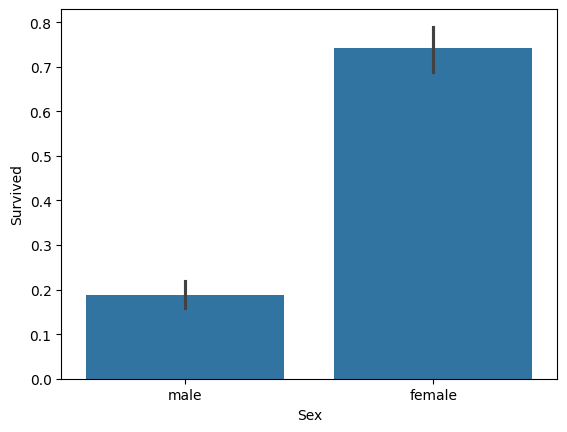

In [100]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

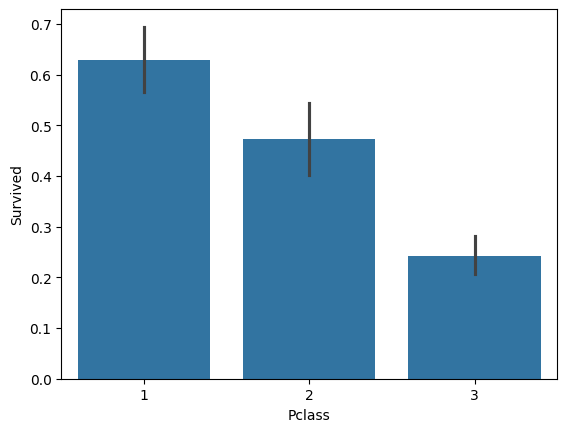

In [102]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

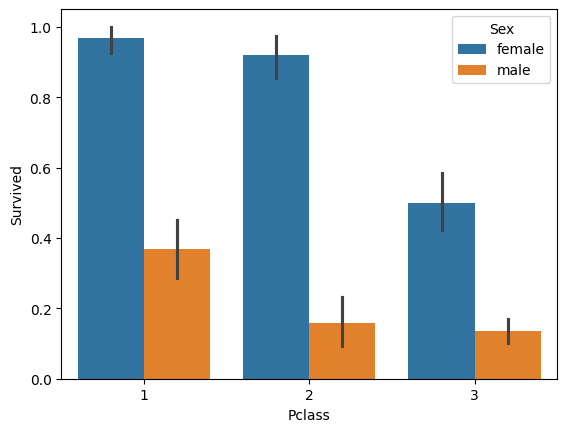

In [103]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [106]:
df = titanic_df.drop(['PassengerId','Name','Ticket'],axis=1)

In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,N,S
1,1,1,female,38,1,0,71.2833,C,C
2,1,3,female,26,0,0,7.9250,N,S
3,1,1,female,35,1,0,53.1000,C,S
4,0,3,male,35,0,0,8.0500,N,S


In [110]:
df[['Sex','Cabin','Embarked']]

,Sex,Cabin,Embarked
0,male,N,S
1,female,C,C
2,female,N,S
3,female,C,S
4,male,N,S
...,...,...,...
886,male,N,S
887,female,B,S
888,female,N,S
889,male,C,C


In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7.2500,7,3
1,1,1,0,38,1,0,71.2833,2,0
2,1,3,0,26,0,0,7.9250,7,3
3,1,1,0,35,1,0,53.1000,2,3
4,0,3,1,35,0,0,8.0500,7,3


In [116]:
df.drop(['Survived'],axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22,1,0,7.2500,7,3
1,1,0,38,1,0,71.2833,2,0
2,3,0,26,0,0,7.9250,7,3
3,1,0,35,1,0,53.1000,2,3
4,3,1,35,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,7,3
887,1,0,19,0,0,30.0000,1,3
888,3,0,29,1,2,23.4500,7,3
889,1,1,26,0,0,30.0000,2,0


In [118]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis=1),df['Survived'],stratify=df['Survived'],random_state=3333)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=3333)
grid_param = {'max_depth':[2,3,4,5,6],'min_samples_split':[2,3,4,5,6,7,8,9]}

grid_model = GridSearchCV(model, param_grid=grid_param, cv=5)

grid_model.fit(X_train,y_train)



,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...om_state=3333)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- 

In [128]:
grid_model.best_score_

np.float64(0.8232970485916283)

In [129]:
pred = grid_model.best_estimator_.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8295964125560538